# Womens Clothing E-Commerce Reviews

In [195]:
#importing the modlues
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import nltk
import string
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os
import sqlite3

In [4]:
E_Data = pd.read_csv('D:\Data_Science\DS_Task\Womens Clothing E-Commerce Reviews\Womens_Clothing_E_Commerce_Reviews.csv')

In [9]:
E_Data =  E_Data.drop(['Unnamed: 0'],axis=1)

In [11]:
E_Data.columns

Index(['Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [12]:
E_Data.columns = ['Clothing_ID', 'Age', 'Title', 'Review_Text', 'Rating',
       'Recommended_IND', 'Positive_Feedback_Count', 'Division_Name',
       'Department_Name', 'Class_Name']

In [13]:
E_Data.head()

,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [14]:
E_Data.shape

(23486, 10)

In [191]:
E_Data.dtypes

Clothing_ID                 int64
Age                         int64
Title                      object
Review_Text                object
Rating                      int64
Recommended_IND             int64
Positive_Feedback_Count     int64
Division_Name              object
Department_Name            object
Class_Name                 object
Class                      object
dtype: object

<h2>Data Description</h2>

<b>There are 10 columns in the dataset and 23486 rows of data</b>
<br>
<b>About the columns :</b>
<ul>
    
<ol>Clothing ID : Unique ID of the Item, because by looking at the data if the Clothing ID is the User id then for the same id the age is different as well as ratings are different. Hence it is the unique ID of item</ol>
<ol>Age : Age of the reviewer</ol>
<ol>Title : Title of the review</ol>
<ol>Review_Text : Review Text</ol>
<ol>Rating : Numbered rating of the review from 1 to 5</ol>
<ol>Recommended_IND : Recommend this to others (Yes (1) or No (0))</ol>
<ol>Positive_Feedback_Count : How many times the user has given positive feedback</ol>
<ol>Division_Name : Name of the item division</ol>
<ol>Department_Name : Name of the item department in the division</ol>
<ol>Class_Name : Name of the item class under a division in the division</ol>
</ul>

In [192]:
E_Data.describe()

,Clothing_ID,Age,Rating,Recommended_IND,Positive_Feedback_Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,918.118709,43.198544,4.196032,0.822362,2.535936
std,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,18.000000,1.000000,0.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000


<h2>Changing the Rating to Bad/Good Based on the Rating<=3--> Bad otherwise Good</h2>

<h3>Finding Null columns in the data</h3>

In [46]:
for i in E_Data.columns[E_Data.isna().any()].tolist():
    print(i,' has' ,E_Data[E_Data[i].isna()==True].shape[0],'Null Values')

Title  has 3810 Null Values
Review_Text  has 845 Null Values
Division_Name  has 14 Null Values
Department_Name  has 14 Null Values
Class_Name  has 14 Null Values


In [54]:
E_Data['Rating'].unique()

array([4, 5, 3, 2, 1], dtype=int64)

In [342]:
E_Data['Class'] = 'Bad'
E_Data.loc[E_Data.Rating>3,['Class']]='Good'

In [1]:
def ret_rating(rating):
    if rating>3:
        return 'Good'
    else:
        return 'Bad'

In [ ]:
E_Data['Class'] = E_Data.apply(lambda x: ret_rating(x['Rating']))

<h2>Data analysis</h2>

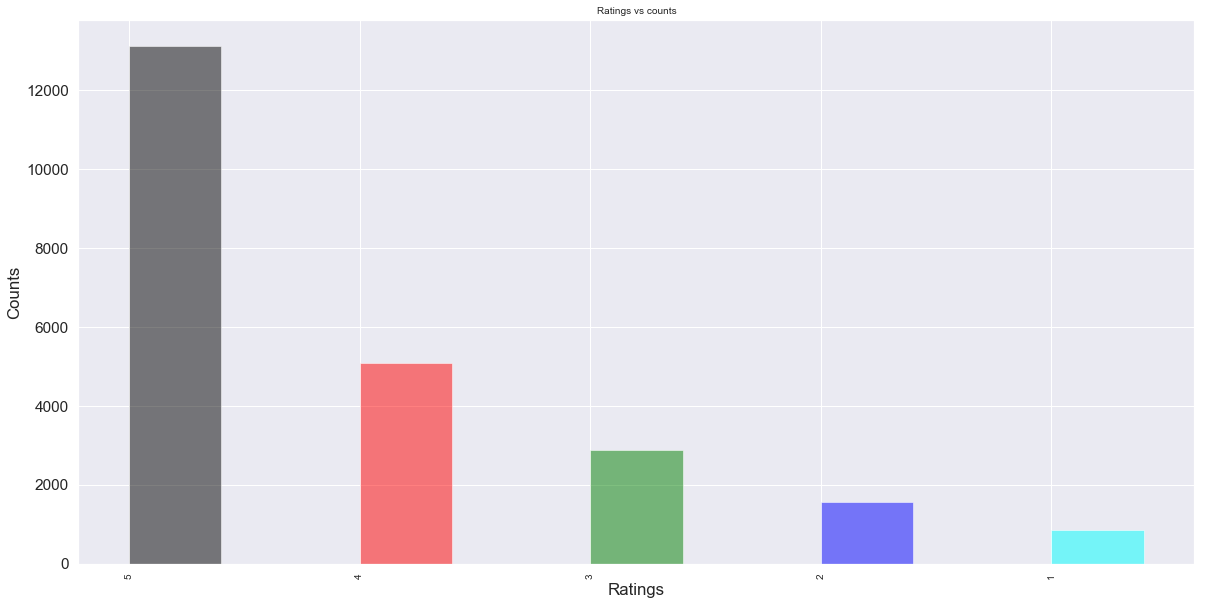

In [343]:
abc1= E_Data.groupby(['Rating'])['Rating'].agg({'counts':'count'})
abc1 = abc1.sort_values(['counts'],ascending=False)
plt.rcParams["figure.figsize"] = (20,10)
y_pos = np.arange(len(abc1.index))
counts = abc1['counts'].tolist()
plt.bar(y_pos, counts,align='edge', width=0.4, alpha=0.5,color=['black', 'red', 'green', 'blue', 'cyan'])
plt.xticks(y_pos, abc1.index,rotation=90,fontsize=10)
plt.ylabel('Counts')
plt.xlabel('Ratings')
plt.title('Ratings vs counts',fontsize=10)
#plt.savefig('Defects_Occured_2013.png',bbox_inches='tight')
plt.show()

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


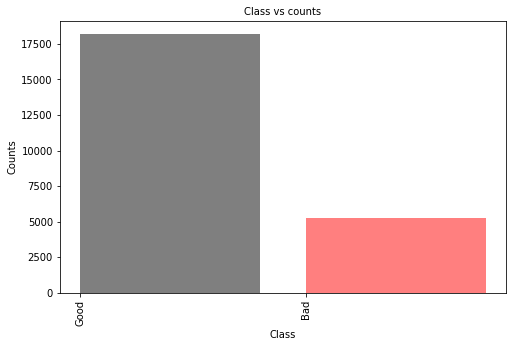

In [81]:
abc1= E_Data.groupby(['Class'])['Class'].agg({'counts':'count'})
abc1 = abc1.sort_values(['counts'],ascending=False)
plt.rcParams["figure.figsize"] = (8,5)
y_pos = np.arange(len(abc1.index))
counts = abc1['counts'].tolist()
plt.bar(y_pos, counts,align='edge', alpha=0.5,color=['black', 'red', 'green', 'blue', 'cyan'])
plt.xticks(y_pos, abc1.index,rotation=90,fontsize=10)
plt.ylabel('Counts')
plt.xlabel('Class')
plt.title('Class vs counts',fontsize=10)
#plt.savefig('Defects_Occured_2013.png',bbox_inches='tight')
plt.show()

<h3>Analysis</h3>

<b>From above plot we can see that data is imbalanced, we have more good reviews when compared to bad reviews</b>

<h3>Let's see which item is been reviewed most</h3>

In [103]:
E_Data.groupby(['Clothing_ID'])['Clothing_ID'].agg({'counts':'count'}).reset_index().sort_values(by='counts',ascending=False)[:10]

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,Clothing_ID,counts
1078,1078,1024
862,862,806
1094,1094,756
1081,1081,582
872,872,545
829,829,527
1110,1110,480
868,868,430
895,895,404
936,936,358


<b>Most reviewed items are 1078,862 and 1094</b>

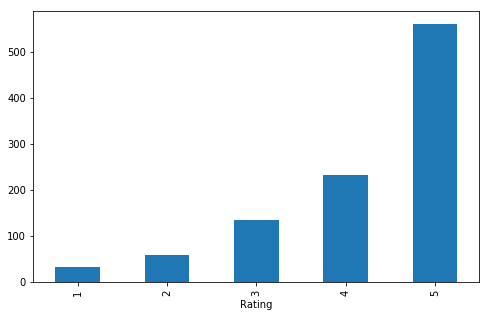

In [95]:
E_Data[E_Data.Clothing_ID==1078].groupby(['Rating'])['Rating'].count().plot(kind='bar')

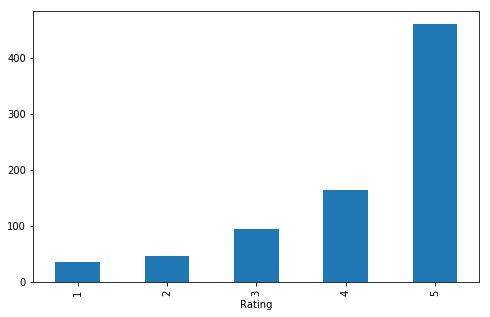

In [96]:
E_Data[E_Data.Clothing_ID==862].groupby(['Rating'])['Rating'].count().plot(kind='bar')

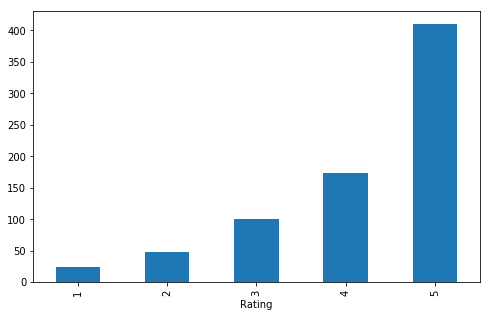

In [97]:
E_Data[(E_Data.Clothing_ID==1094) ].groupby(['Rating'])['Rating'].count().plot(kind='bar')

<h3>Lets find which product has highest number of good/bad reviews</h3>

In [104]:
E_Data[E_Data.Class=='Good'].groupby(['Clothing_ID'])['Clothing_ID'].agg({'counts':'count'}).reset_index().sort_values(by='counts',ascending=False)[:10]

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,Clothing_ID,counts
963,1078,796
758,862,627
979,1094,584
966,1081,471
768,872,459
726,829,406
995,1110,377
788,895,323
764,868,295
827,936,285


In [105]:
E_Data[E_Data.Class=='Bad'].groupby(['Clothing_ID'])['Clothing_ID'].agg({'counts':'count'}).reset_index().sort_values(by='counts',ascending=False)[:10]

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,Clothing_ID,counts
509,1078,228
325,862,179
525,1094,172
331,868,135
297,829,121
512,1081,111
540,1110,103
526,1095,88
335,872,86
330,867,84


<b>Intrestingly top Good & Bad Reviews are given to the same products 1078,862 and 1094, might be because of the high no of reviews given for 1078,862 and 1094</b>

In [116]:
E_Data[E_Data.Age<90]['Age'].agg({'min','max'})

max    89
min    18
Name: Age, dtype: int64

In [119]:
E_Data[E_Data.Age>50]

,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name,Class
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,Bad
10,1077,53,Dress looks like it's made of cheap material,Dress runs small esp where the zipper area run...,3,0,14,General,Dresses,Dresses,Bad
12,1095,53,Perfect!!!,More and more i find myself reliant on the rev...,5,1,2,General Petite,Dresses,Dresses,Good
21,1080,55,I'm torn!,"I'm upset because for the price of the dress, ...",4,1,14,General,Dresses,Dresses,Good
24,847,55,Versatile,"I love this shirt because when i first saw it,...",5,1,0,General,Tops,Blouses,Good
28,684,53,Great shirt!!!,I have several of goodhyouman shirts and i get...,5,1,2,Initmates,Intimate,Lounge,Good
35,1060,65,Lovely!,Wouldn't have given them a second look but tri...,4,1,3,General Petite,Bottoms,Pants,Good
39,862,59,NaN,Great casual top with flare. looks cute with g...,5,1,0,General,Tops,Knits,Good
43,89,67,Some things you should know...,"First, this is thermal ,so naturally i didn't ...",4,1,1,Initmates,Intimate,Sleep,Good
47,823,52,NaN,"Very comfortable, material is good, cut out on...",5,1,0,General,Tops,Blouses,Good


In [142]:
Age_List = pd.DataFrame(columns=['Age_Group','Total_Reviews','Good','Bad'])
ag_list=[]
for i in [[18,25],[26,30],[31,40],[41,50],[51,60],[61,70],[71,100]]:
    #print(i[0],i[1],E_Data[(E_Data.Age>=i[0]) & (E_Data.Age<i[1])].groupby('Class')['Class'].count()['Bad'],
        # E_Data[(E_Data.Age>=i[0]) & (E_Data.Age<i[1])].groupby('Class')['Class'].count()['Good'],E_Data[(E_Data.Age>=i[0]) & (E_Data.Age<i[1])]['Class'].count())
    ag_list.append([str(i[0])+'-'+str(i[1]),E_Data[(E_Data.Age>=i[0]) & (E_Data.Age<i[1])]['Class'].count(),
                   E_Data[(E_Data.Age>=i[0]) & (E_Data.Age<i[1])].groupby('Class')['Class'].count()['Good'],E_Data[(E_Data.Age>=i[0]) & (E_Data.Age<i[1])].groupby('Class')['Class'].count()['Bad']])
Age_List = Age_List.append(pd.DataFrame(ag_list, columns=['Age_Group','Total_Reviews','Good','Bad']),ignore_index=True)

In [143]:
Age_List

,Age_Group,Total_Reviews,Good,Bad
0,18-25,892,733,159
1,26-30,1708,1271,437
2,31-40,7295,5585,1710
3,41-50,5510,4230,1280
4,51-60,3550,2822,728
5,61-70,1964,1589,375
6,71-100,380,302,78


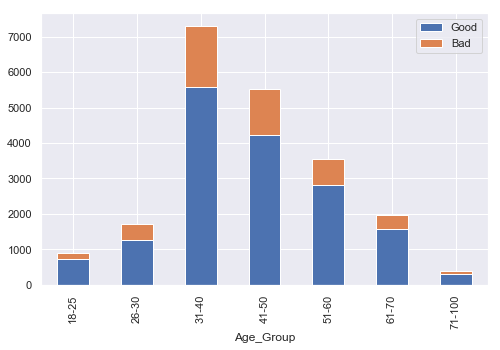

In [140]:
sns.set()
Age_List[['Age_Group','Good','Bad']].set_index('Age_Group').plot(kind='bar', stacked=True)

<b>We can see that age groups 31-40,41-50,51-60 has given highest number of negative reviews</b>

In [144]:
E_Data.columns

Index(['Clothing_ID', 'Age', 'Title', 'Review_Text', 'Rating',
       'Recommended_IND', 'Positive_Feedback_Count', 'Division_Name',
       'Department_Name', 'Class_Name', 'Class'],
      dtype='object')

In [165]:
E_Data[(E_Data.Class=='Bad') & (E_Data.Recommended_IND==1)][['Class','Recommended_IND']].count()

Class              1299
Recommended_IND    1299
dtype: int64

In [188]:
Rec_List = pd.DataFrame(columns=['Class','Ind1_Count','Ind0_Count'])
Rc_list=[]
for i in list([[1,0,'Good'],[1,0,'Bad']]):
    #print(i[0],i[1])
    #print(E_Data[(E_Data.Class==i[1]) & (E_Data.Recommended_IND==int(i[0]))]['Class'].count())
    Rc_list.append([i[2],E_Data[(E_Data.Class==i[2]) & (E_Data.Recommended_IND==int(i[0]))]['Class'].count(),E_Data[(E_Data.Class==i[2]) & (E_Data.Recommended_IND==int(i[1]))]['Class'].count()])
Rec_List = Rec_List.append(pd.DataFrame(Rc_list, columns=['Class','Ind1_Count','Ind0_Count']),ignore_index=True)

In [189]:
Rec_List

,Class,Ind1_Count,Ind0_Count
0,Good,18015,193
1,Bad,1299,3979


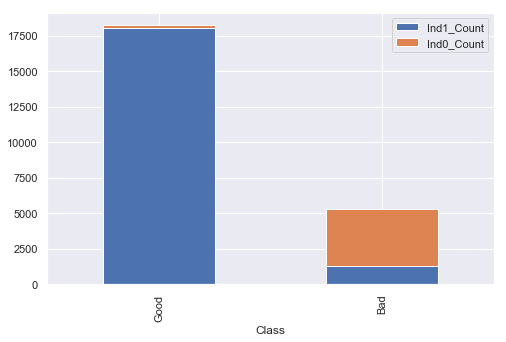

In [190]:
sns.set()
Rec_List[['Class','Ind1_Count','Ind0_Count']].set_index('Class').plot(kind='bar', stacked=True)

<b>From the above plot we can see that, When the recommendation indicator is 1 , it is most likely to be the good review and if the recommendation indicator is 0, it is most likely to be bad review</b>

<h2>Finding the correlation between the Input variables</h2>

In [193]:
E_Data.corr(method='pearson')

,Clothing_ID,Age,Rating,Recommended_IND,Positive_Feedback_Count
Clothing_ID,1.000000,0.017972,-0.018879,-0.016206,0.046356
Age,0.017972,1.000000,0.026831,0.030622,0.043079
Rating,-0.018879,0.026831,1.000000,0.792336,-0.064961
Recommended_IND,-0.016206,0.030622,0.792336,1.000000,-0.069045
Positive_Feedback_Count,0.046356,0.043079,-0.064961,-0.069045,1.000000


<b>From the above correlation matrix we can see that, Recommended_IND has high correlation with the rating </b>

<h2>Data Cleaning and text preprocessing </h2>

<h2>Droppping Null Values</h2>

As of now we are dropping the rows only the review text column is null, reason is we not going to use the title currently as well as division, department and class names

In [201]:
E_Data_Raw = E_Data.copy()

In [208]:
E_Data_Raw = E_Data_Raw.dropna(subset=['Review_Text'])

In [211]:
#text preprocessing starts
import re
import nltk
nltk.download('stopwords')

#from nltk.stem import WordNetLemmatizer
#wordnet_lemmatizer = WordNetLemmatizer()
stop = set(stopwords.words('english')) 
sno = nltk.stem.SnowballStemmer('english')

def cleanhtml(sentence): #function to clean the word of any html-tags
    #print(sentence)
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext
def cleanpunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
if not os.path.isfile('cleaned_final.sqlite'):
    final_string=[]
    all_positive_words=[] # store words from +ve reviews here
    all_negative_words=[] # store words from -ve reviews here.
    #h=0
    for i, sent in enumerate(tqdm(E_Data_Raw['Review_Text'].values)):
        #h+=1
        filtered_sentence=[]
        #print(sent,h);
        sent=cleanhtml(sent) # remove HTMl tags
        for w in sent.split():
            # we have used cleanpunc(w).split(), one more split function here because consider w="abc.def", cleanpunc(w) will return "abc def"
            # if we dont use .split() function then we will be considring "abc def" as a single word, but if you use .split() function we will get "abc", "def"
            for cleaned_words in cleanpunc(w).split():
                if((cleaned_words.isalpha()) & (len(cleaned_words)>2)):    
                    if(cleaned_words.lower() not in stop):
                        s=(sno.stem(cleaned_words.lower())).encode('utf8')
                        filtered_sentence.append(s)

        str1 = b" ".join(filtered_sentence) #final string of cleaned words
        #print("***********************************************************************")
        final_string.append(str1)

    #############---- storing the data into .sqlite file ------########################
    E_Data_Raw['CleanedText']=final_string #adding a column of CleanedText which displays the data after pre-processing of the review 
    E_Data_Raw['CleanedText']=E_Data_Raw['CleanedText'].str.decode("utf-8")
        # store final table into an SQlLite table for future.
    conn = sqlite3.connect('cleaned_final.sqlite')
    c=conn.cursor()
    conn.text_factory = str
    E_Data_Raw.to_sql('Reviews', conn,  schema=None, if_exists='replace', \
                 index=True, index_label=None, chunksize=None, dtype=None)
    conn.close()
    

In [213]:
import os
if os.path.isfile('cleaned_final.sqlite'):
    conn = sqlite3.connect('cleaned_final.sqlite')
    final = pd.read_sql_query(""" SELECT * FROM Reviews""", conn)
    conn.close()
else:
    print("Please run the above cell")

In [214]:
final.head()

,index,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name,Class,CleanedText
0,0,767,33,None,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,Good,absolut wonder silki sexi comfort
1,1,1080,34,None,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,Good,love dress sooo pretti happen find store glad ...
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,Bad,high hope dress realli want work initi order p...
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,Good,love love love jumpsuit fun flirti fabul everi...
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,Good,shirt flatter due adjust front tie perfect len...


<h2>Good Class Word Cloud</h2>

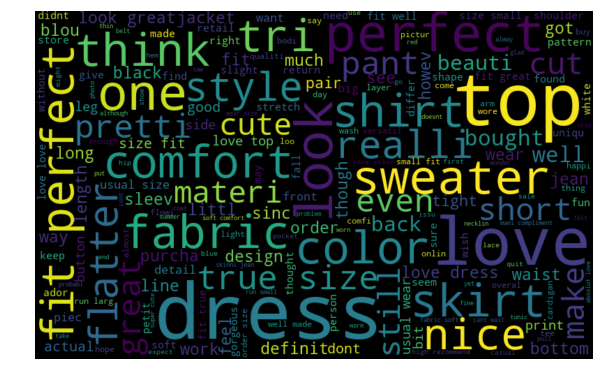

In [225]:
from wordcloud import WordCloud
Good_all_words = ' '.join([text for text in final[final.Class=='Good']['CleanedText']]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(Good_all_words) 
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

<h2>Bad Class Word Cloud</h2>

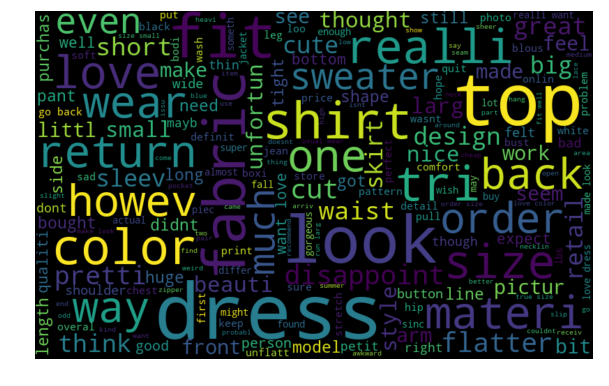

In [226]:
from wordcloud import WordCloud
Bad_all_words = ' '.join([text for text in final[final.Class=='Bad']['CleanedText']]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

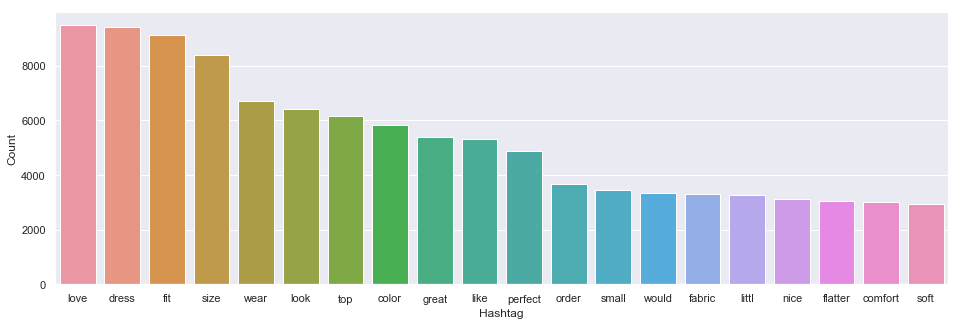

In [227]:
a = nltk.FreqDist(Good_all_words.split(" ")) 
d = pd.DataFrame({'Hashtag': list(a.keys()),'Count': list(a.values())}) 
# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5)) 
colors = ['r','g','b']
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel ='Count') 
plt.show()

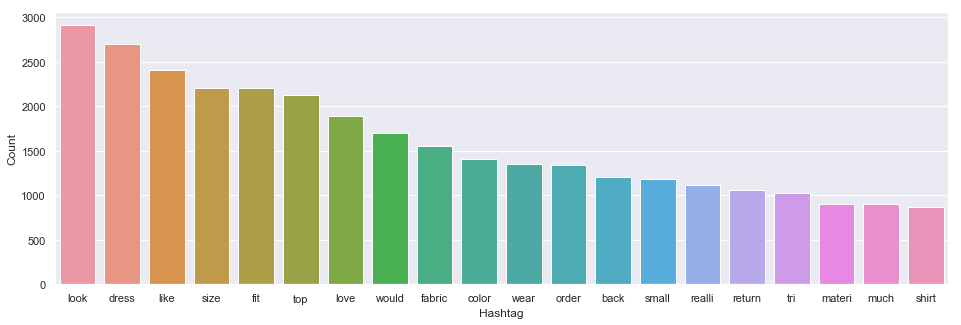

In [228]:
a = nltk.FreqDist(Bad_all_words.split(" ")) 
d = pd.DataFrame({'Hashtag': list(a.keys()),'Count': list(a.values())}) 
# selecting top 20 most frequent Words    
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5)) 
colors = ['r','g','b']
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel ='Count') 
plt.show()

<h2>Encoding the text data and applying modelling</h2>

In [229]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
#from sklearn.model_selection import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
#from sklearn import cross_validation

In [233]:
x_train1 ,x_test1 = train_test_split(final[['CleanedText','Recommended_IND']],test_size=0.2)

In [234]:
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
tf_idf_vect.fit_transform(x_train1['CleanedText'])
final_tf_idf = tf_idf_vect.transform(final['CleanedText'].values)
print("the shape of out text TFIDF vectorizer ",final_tf_idf.get_shape())
print("the number of unique words", final_tf_idf.get_shape()[1])# Please write all the code with proper documentation

the shape of out text TFIDF vectorizer  (22641, 194974)
the number of unique words 194974


In [237]:
final['Class_Ind']=1
final.loc[final.Class=='Bad',['Class_Ind']]=0

In [241]:
type(final_tf_idf)

scipy.sparse.csr.csr_matrix

In [254]:
.shape

(22641, 1)

In [252]:
final_tf_idf.shape

(22641, 194974)

In [255]:
import scipy
from scipy.sparse import hstack
Final_Data = hstack((final_tf_idf,scipy.sparse.csr_matrix(final['Recommended_IND']).T ))
#FInal_Data = pd.concat([final_tf_idf, scipy.sparse.csr_matrix(s1.values)], axis=1)

In [256]:
Final_Data.shape

(22641, 194975)

In [276]:
X_tr, X_test ,y_tr, y_test = train_test_split(Final_Data, final['Class_Ind'], test_size=0.3 ,random_state=0)

In [277]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import BernoulliNB
C  = [10**x for x in range(-4,4)]
tuned_parameters = [{'alpha': C}]
model = GridSearchCV(BernoulliNB( binarize=0.0, class_prior=None, fit_prior=True), tuned_parameters, scoring = 'f1_macro', cv=5)
model.fit(X_tr, y_tr)
cv_scores  = model.cv_results_['mean_test_score']
train_scores  = model.cv_results_['mean_train_score']

In [278]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
PD_VALUES = model.predict(X_test)
f1_score(y_test, PD_VALUES, average='macro')

0.8199570819661348

In [279]:
PD_VALUES_TRN = model.predict(X_tr)

In [274]:
accuracy_score(y_tr, PD_VALUES_TRN)

0.9955830388692579

In [275]:
accuracy_score(y_test, PD_VALUES)

0.8429265420285588

In [261]:
cm=metrics.confusion_matrix(y_test, PD_VALUES)
print(cm)

[[1212  393]
 [ 512 4676]]


[[1212  393]
 [ 512 4676]]


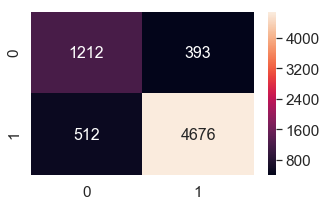

In [266]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
cm=metrics.confusion_matrix(y_test, PD_VALUES)
print(cm)      
df_cm = pd.DataFrame(cm, range(2),
                  range(2))
plt.figure(figsize = (5,3))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')# font size

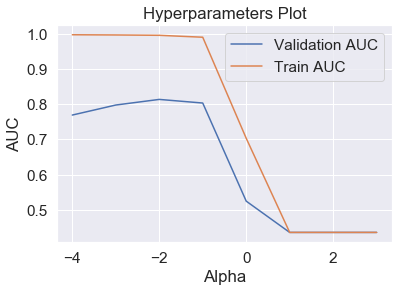

In [282]:
import matplotlib.pyplot as plt
import math
plt.plot(np.log10(C),cv_scores,label="Validation AUC")
plt.plot(np.log10(C),train_scores,label="Train AUC")
plt.ylabel('AUC')
plt.xlabel('Alpha')
plt.title('Hyperparameters Plot')
plt.legend()
plt.show()

<h2>Applying linear SVM</h2>

In [328]:
alpha1 = [10**x for x in range(-4,4)]
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
tuned_parameters = [{'alpha': alpha1}]
model = GridSearchCV(SGDClassifier(loss='hinge', penalty='l1'), tuned_parameters, scoring ='roc_auc', cv=5)
model.fit(X_tr, y_tr)
cv_scores = model.cv_results_['mean_test_score']
train_scores = model.cv_results_['mean_train_score']

In [329]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
PD_VALUES = model.predict(X_test)
print('Test F1 Score',f1_score(y_test, PD_VALUES, average='macro'))
PD_VALUES_TRN = model.predict(X_tr)
print('Train Accuracy ',accuracy_score(y_tr, PD_VALUES_TRN))
print('Test Accuracy ',accuracy_score(y_test, PD_VALUES))

Test F1 Score 0.8995785979988791
Train Accuracy  0.9362064613831398
Test Accuracy  0.9330192845576328


[[1209  396]
 [  59 5129]]


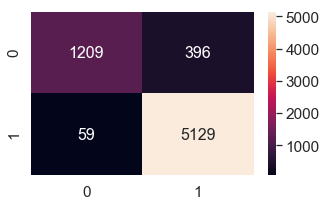

In [330]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
cm=metrics.confusion_matrix(y_test, PD_VALUES)
print(cm)      
df_cm = pd.DataFrame(cm, range(2),
                  range(2))
plt.figure(figsize = (5,3))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')# font size

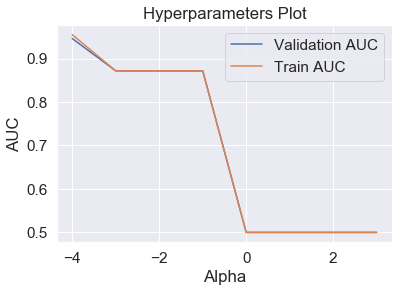

In [331]:
import matplotlib.pyplot as plt
import math
plt.plot(np.log10(tuned_parameters[0]['alpha']),cv_scores,label="Validation AUC")
plt.plot(np.log10(tuned_parameters[0]['alpha']),train_scores,label="Train AUC")
plt.ylabel('AUC')
plt.xlabel('Alpha')
plt.title('Hyperparameters Plot')
plt.legend()
plt.show()

In [332]:
best_a = model.best_params_['alpha']
SGD_CLF = SGDClassifier(alpha=best_a,loss='hinge', penalty='l1');
SGD_CLF.fit(X_tr, y_tr);
w = SGD_CLF.coef_

In [333]:
weights = SGD_CLF.coef_.argsort()
new_weights = weights[0][:-1]
pos_weights = np.take(tf_idf_vect.get_feature_names(),new_weights[-20:])
print("*******************Top 20 positive features*****************************")
print(pos_weights)
print("************************************************************************")

*******************Top 20 positive features*****************************
['get' 'gentl flutter' 'ive' 'glad' 'wear' 'littl' 'boot' 'happi' 'beauti'
 'bought' 'slight' 'purchas' 'flatter' 'great' 'jacket' 'love' 'comfi'
 'compliment' 'comfort' 'perfect']
************************************************************************


In [334]:
weights = SGD_CLF.coef_.argsort()
new_weights = weights[0][:-1]
pos_weights = np.take(tf_idf_vect.get_feature_names(),new_weights[:20])
print("*******************Top 20 Negative features*****************************")
print(pos_weights)
print("************************************************************************")

*******************Top 20 Negative features*****************************
['want love' 'disappoint' 'odd' 'return' 'howev' 'unflatt' 'didnt fit'
 'sad' 'thin' 'shrunk' 'felt like' 'would' 'bad' 'arm' 'cheap' 'way'
 'also' 'larger' 'go' 'weird']
************************************************************************


<h2>XGBOOST on the data</h2>

In [339]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
x_cfl=XGBClassifier()
parameters = { #when use hyperthread, xgboost may become slower
              'learning_rate': [ 0.05, .07,0.01], #so called `eta` value
              'max_depth': [5, 6, 7],
              'n_estimators': [10,50,100,500]}

model = RandomizedSearchCV(x_cfl,parameters,verbose=True,scoring ='roc_auc', cv=2,n_jobs=-1)
model.fit(X_tr, y_tr)
cv_scores = model.cv_results_['mean_test_score']
train_scores = model.cv_results_['mean_train_score']

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 66.6min finished


In [340]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
PD_VALUES = model.predict(X_test)
print('Test F1 Score',f1_score(y_test, PD_VALUES, average='macro'))
PD_VALUES_TRN = model.predict(X_tr)
print('Train Accuracy ',accuracy_score(y_tr, PD_VALUES_TRN))
print('Test Accuracy ',accuracy_score(y_test, PD_VALUES))

Test F1 Score 0.9009243677105989
Train Accuracy  0.962266532054518
Test Accuracy  0.933313705284852


[[1228  377]
 [  76 5112]]


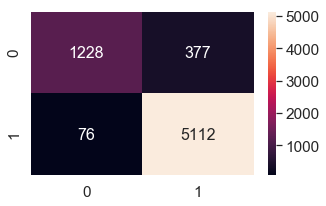

In [341]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
cm=metrics.confusion_matrix(y_test, PD_VALUES)
print(cm)      
df_cm = pd.DataFrame(cm, range(2),
                  range(2))
plt.figure(figsize = (5,3))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')# font size